# CASO MERCADEO


In [12]:
#TRATAMIENTO DE DATOS
import pandas as pd
import numpy as np
#GRÁFICOS
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans', 'DejaVuSerif']
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram
import plotly.express as px
#PREPARACIÓN DE DATOS
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
#MODELADO
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from itertools import product
#EVALUACIÓN
from sklearn.metrics import silhouette_score
#ADVERTENCIAS
import warnings
warnings.filterwarnings('ignore')

## Importar / Cargar Datos

In [3]:
datos = pd.read_csv('datos_caso_2.csv')
datos = datos.sample(4000)
datos.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1888,C11950,365.005559,1.0,421.04,341.00,80.04,0.000000,0.333333,0.083333,0.333333,0.000000,0,6,4000.0,1386.413639,110.535797,0.000000,12
7405,C17607,709.475496,1.0,0.00,0.00,0.00,1240.838098,0.000000,0.000000,0.000000,0.250000,4,0,1000.0,1242.989700,402.871353,0.083333,12
1624,C11678,8159.168439,1.0,2453.07,1845.55,607.52,3278.461198,1.000000,0.916667,1.000000,0.250000,3,42,15000.0,1698.958527,2137.893656,0.000000,12
1214,C11258,3597.728209,1.0,1043.00,0.00,1043.00,836.723952,0.583333,0.000000,0.500000,0.083333,1,7,6000.0,1222.771295,913.580145,0.000000,12
4333,C14455,2224.000236,1.0,2276.41,1787.77,488.64,628.841571,0.833333,0.500000,0.666667,0.333333,6,39,4500.0,3755.786767,685.860574,0.000000,12


## Completitud y tipología de datos


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1888 to 3350
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4000 non-null   object 
 1   BALANCE                           4000 non-null   float64
 2   BALANCE_FREQUENCY                 4000 non-null   float64
 3   PURCHASES                         4000 non-null   float64
 4   ONEOFF_PURCHASES                  4000 non-null   float64
 5   INSTALLMENTS_PURCHASES            4000 non-null   float64
 6   CASH_ADVANCE                      4000 non-null   float64
 7   PURCHASES_FREQUENCY               4000 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4000 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4000 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4000 non-null   float64
 11  CASH_ADVANCE_TRX                  4000 non-null   int64  
 12  PUR

## Exploración de datos

In [6]:
#EXPLORACIÓN UNIVARIADA
datos.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,3871.000000,4000.000000,4000.000000
mean,1593.480714,0.878248,1030.296618,603.766192,426.593248,981.641188,0.492528,0.207797,0.367218,0.136429,3.230250,15.172750,4559.097538,1784.891796,909.731961,0.153025,11.535000
std,2150.516901,0.236069,2100.473056,1618.615367,910.333270,2051.538201,0.404165,0.303844,0.399515,0.200425,6.535894,25.431351,3697.349895,2961.660381,2628.395082,0.289725,1.311947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.117036,0.000000,6.000000
25%,133.922444,0.888889,35.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1700.000000,390.759715,169.926534,0.000000,12.000000
50%,879.096041,1.000000,365.000000,45.650000,92.350000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,881.222239,308.604961,0.000000,12.000000
75%,2074.683066,1.000000,1161.495000,590.000000,487.720000,1141.657210,1.000000,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1985.204818,810.478989,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,14686.100000,27296.485760,1.000000,1.000000,1.000000,1.250000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Análisis Gráfico Univariado

Histogramas de frecuencia

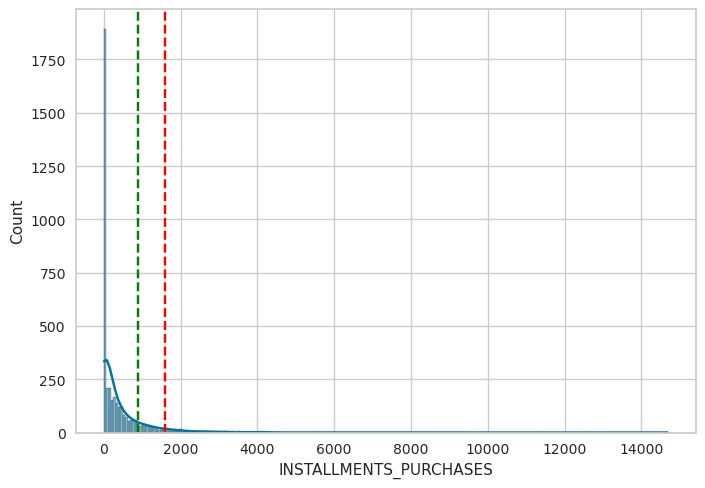

In [13]:
sb.histplot(data = datos, x = "INSTALLMENTS_PURCHASES", kde = True)
plt.axvline(x = datos.BALANCE.mean(), color = "red", linestyle = "dashed")
plt.axvline(x = datos.BALANCE.median(), color = "green", linestyle = "dashed")
plt.show()

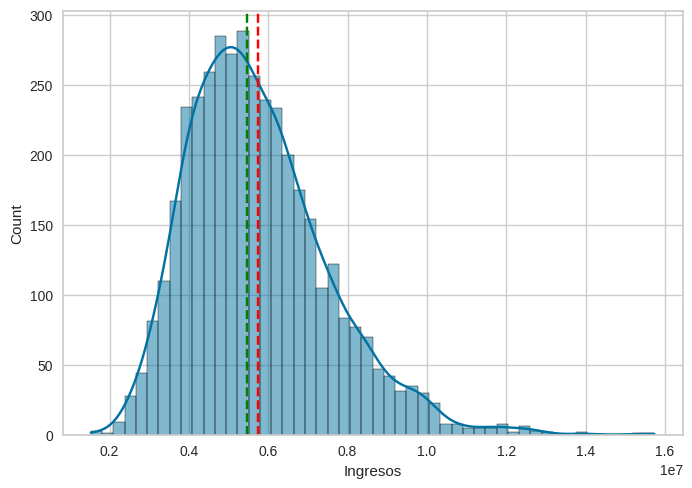

In [ ]:
sb.histplot(data = datos, x = "Ingresos", kde = True)
plt.axvline(x = datos.Ingresos.mean(), color = "red", linestyle = "dashed")
plt.axvline(x = datos.Ingresos.median(), color = "green", linestyle = "dashed")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

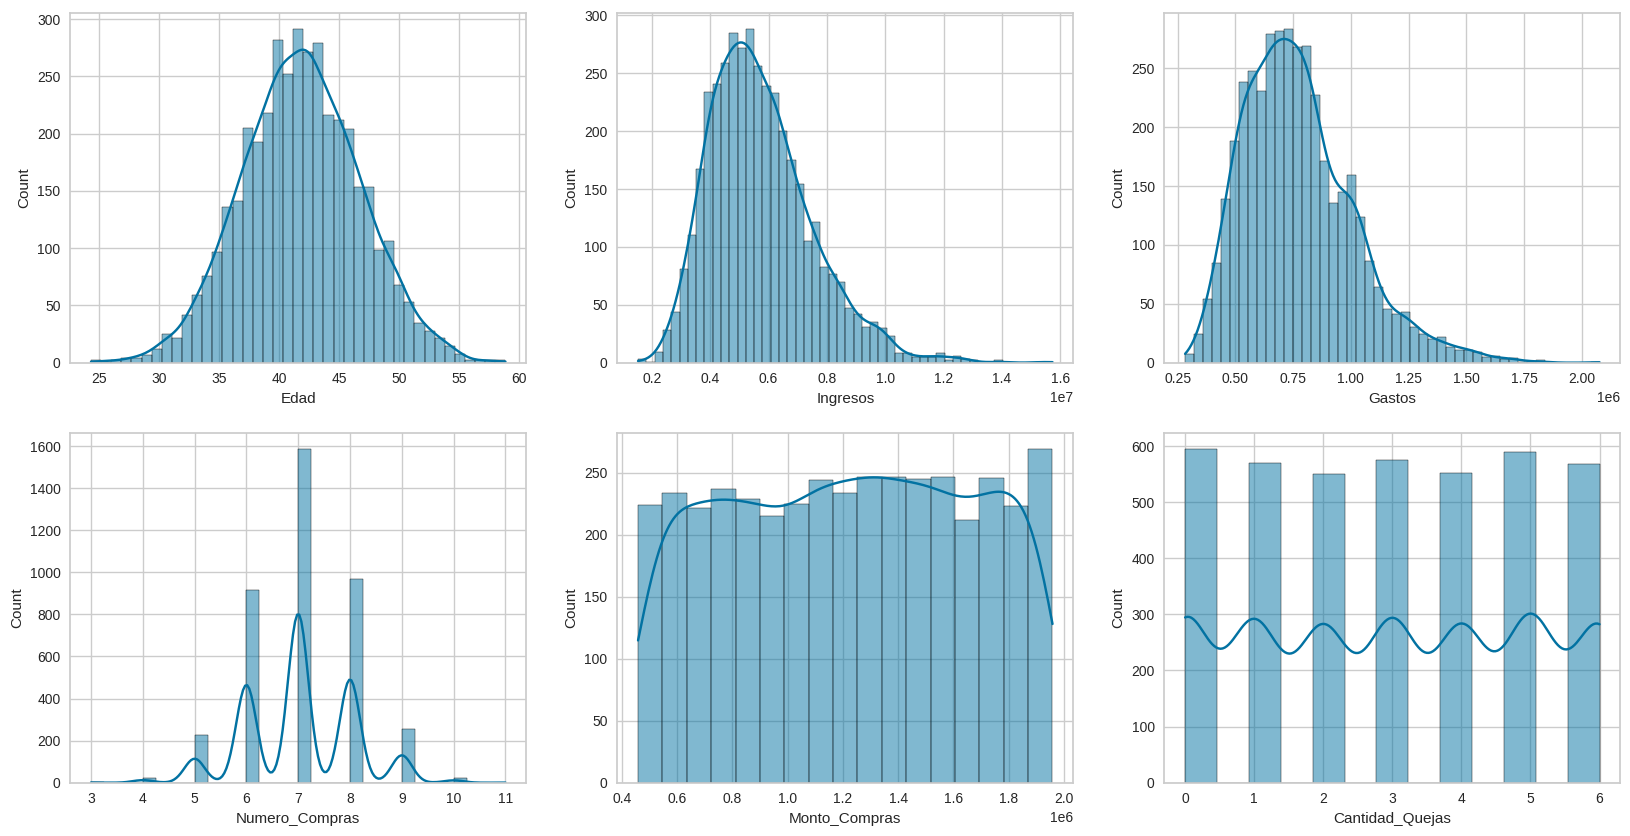

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10))
sb.histplot(data = datos, x = "Edad", kde = True, ax = ax[0,0])
sb.histplot(data = datos, x = "Ingresos", kde = True, ax = ax[0,1])
sb.histplot(data = datos, x = "Gastos", kde = True, ax = ax[0,2])
sb.histplot(data = datos, x = "Numero_Compras", kde = True, ax = ax[1,0])
sb.histplot(data = datos, x = "Monto_Compras", kde = True, ax = ax[1,1])
sb.histplot(data = datos, x = "Cantidad_Quejas", kde = True, ax = ax[1,2])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

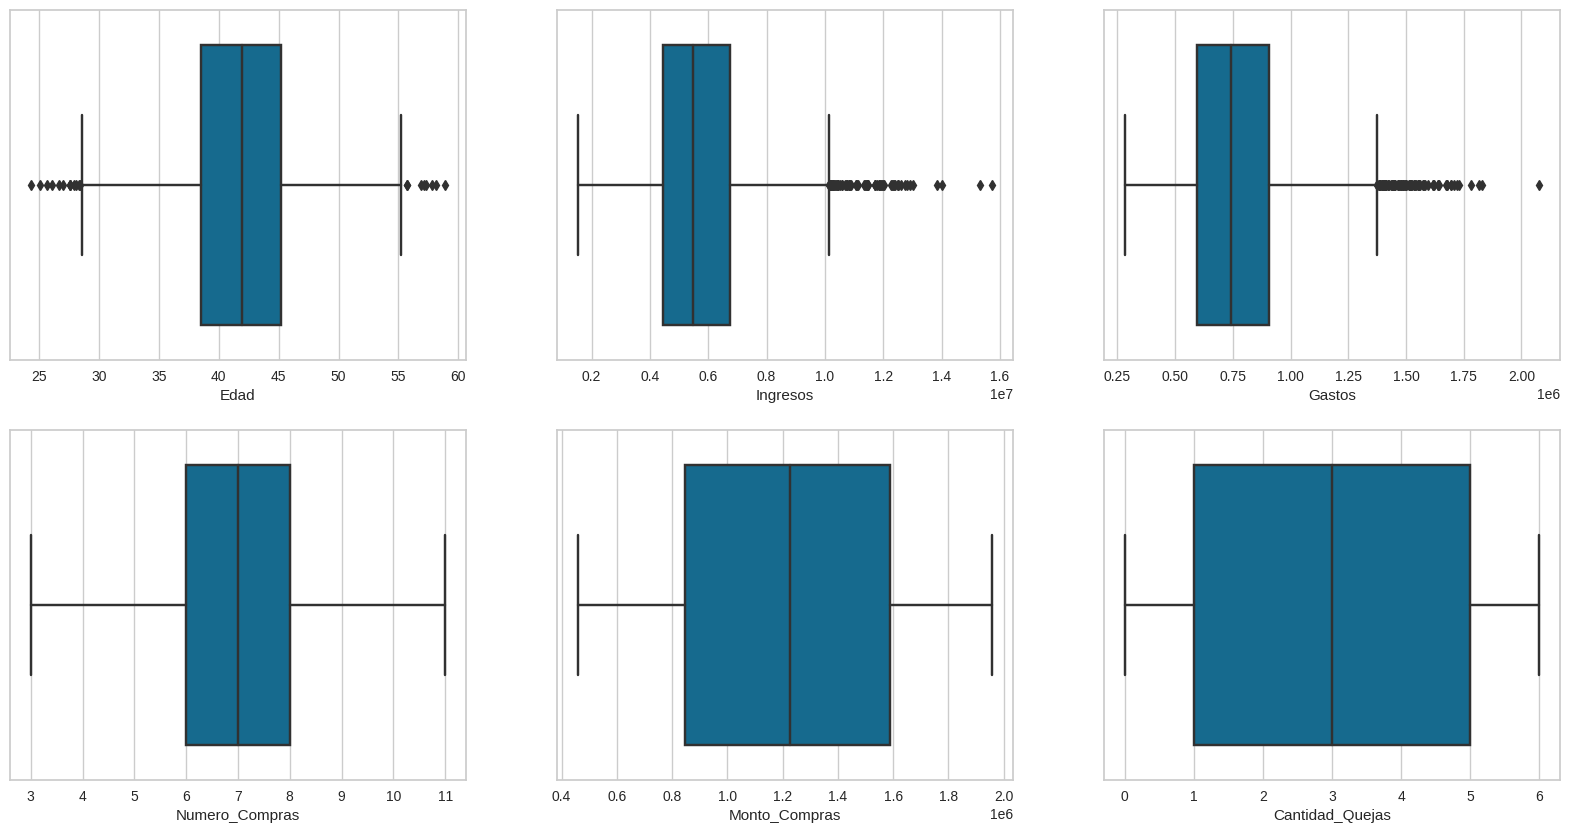

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10))
sb.boxplot(data = datos, x = "Edad", ax = ax[0,0])
sb.boxplot(data = datos, x = "Ingresos", ax = ax[0,1])
sb.boxplot(data = datos, x = "Gastos", ax = ax[0,2])
sb.boxplot(data = datos, x = "Numero_Compras", ax = ax[1,0])
sb.boxplot(data = datos, x = "Monto_Compras", ax = ax[1,1])
sb.boxplot(data = datos, x = "Cantidad_Quejas", ax = ax[1,2])
plt.show

### Graficos de relación y proporción

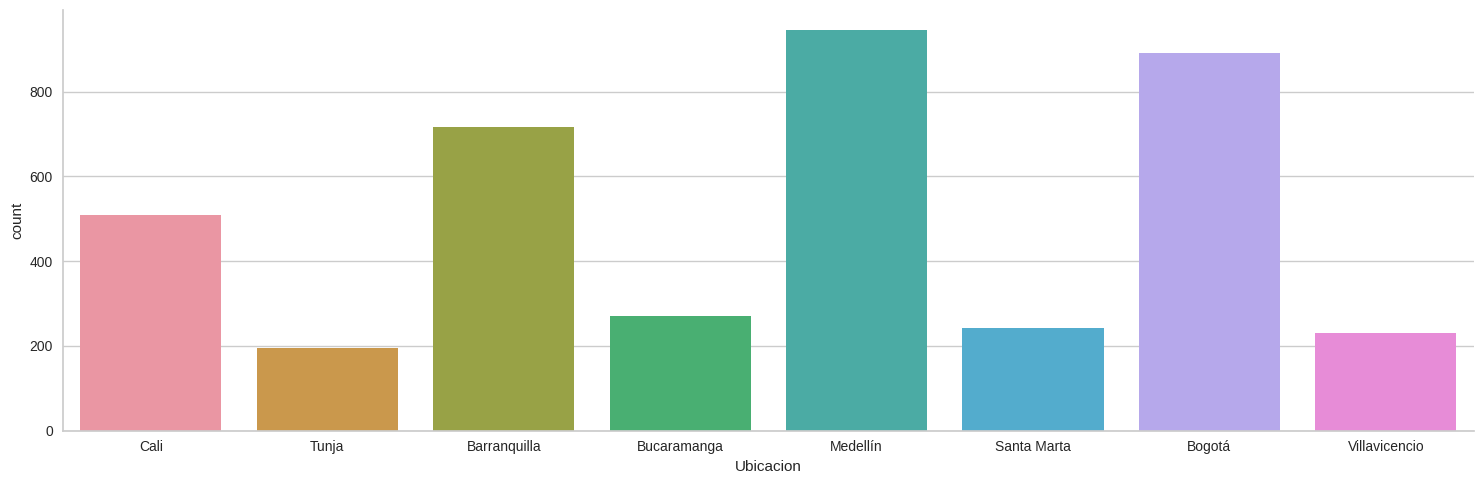

In [ ]:
sb.catplot(data = datos, x = "Ubicacion", kind = "count", aspect = 3)
plt.show()

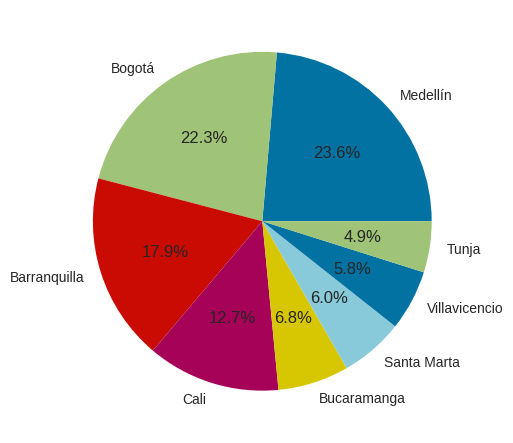

In [ ]:
plt.pie(x = datos.Ubicacion.value_counts(), labels = datos.Ubicacion.value_counts().index, autopct = "%0.01f%%")
plt.show()

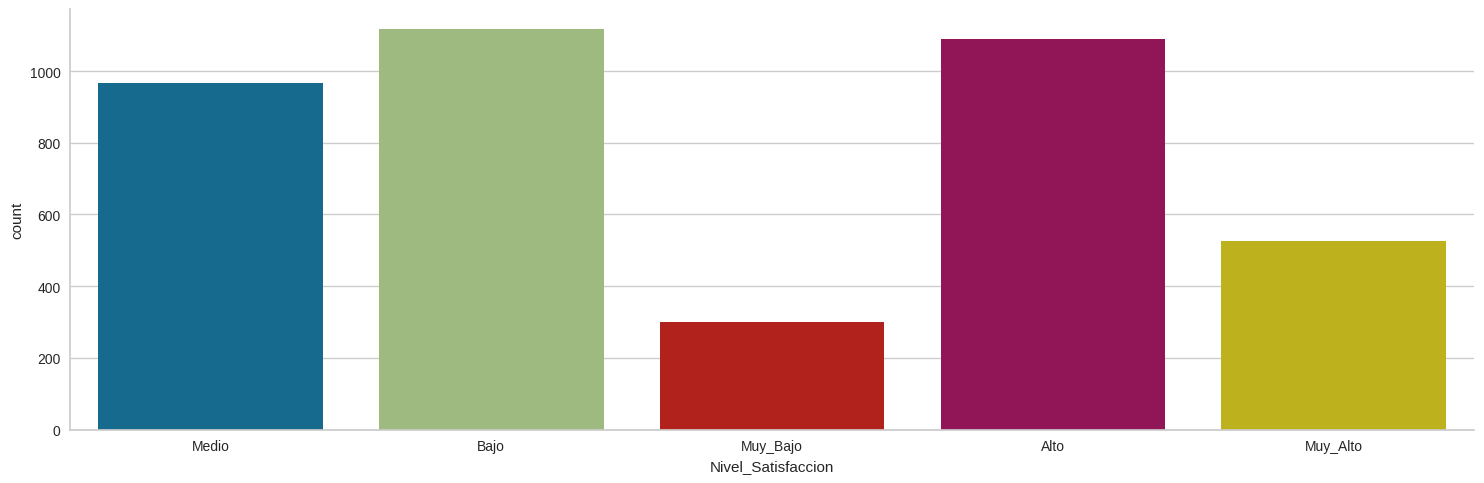

In [ ]:
sb.catplot(data = datos, x = "Nivel_Satisfaccion", kind = "count", aspect = 3)
plt.show()

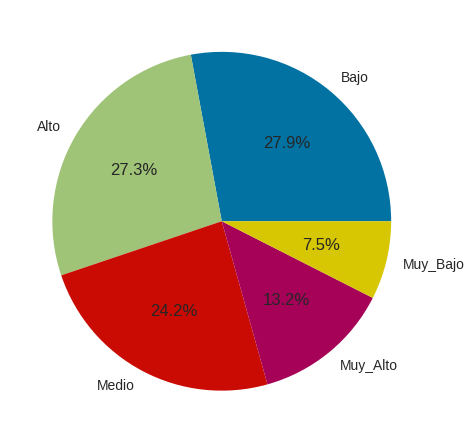

In [ ]:
plt.pie(x = datos.Nivel_Satisfaccion.value_counts(), labels = datos.Nivel_Satisfaccion.value_counts().index, autopct = "%0.01f%%")
plt.show()

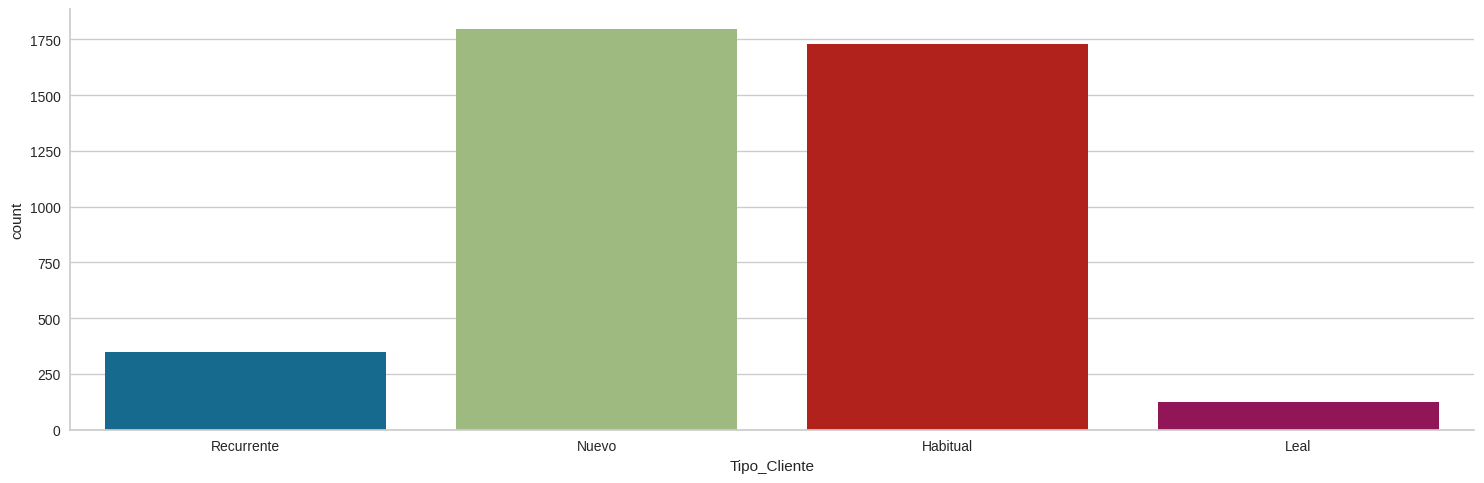

In [ ]:
sb.catplot(data = datos, x = "Tipo_Cliente", kind = "count", aspect = 3)
plt.show()

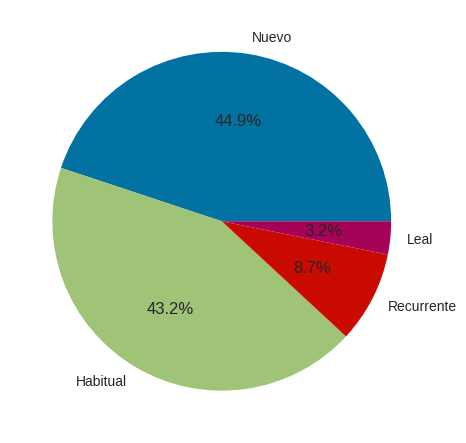

In [ ]:
plt.pie(x = datos.Tipo_Cliente.value_counts(), labels = datos.Tipo_Cliente.value_counts().index, autopct = "%0.01f%%")
plt.show()

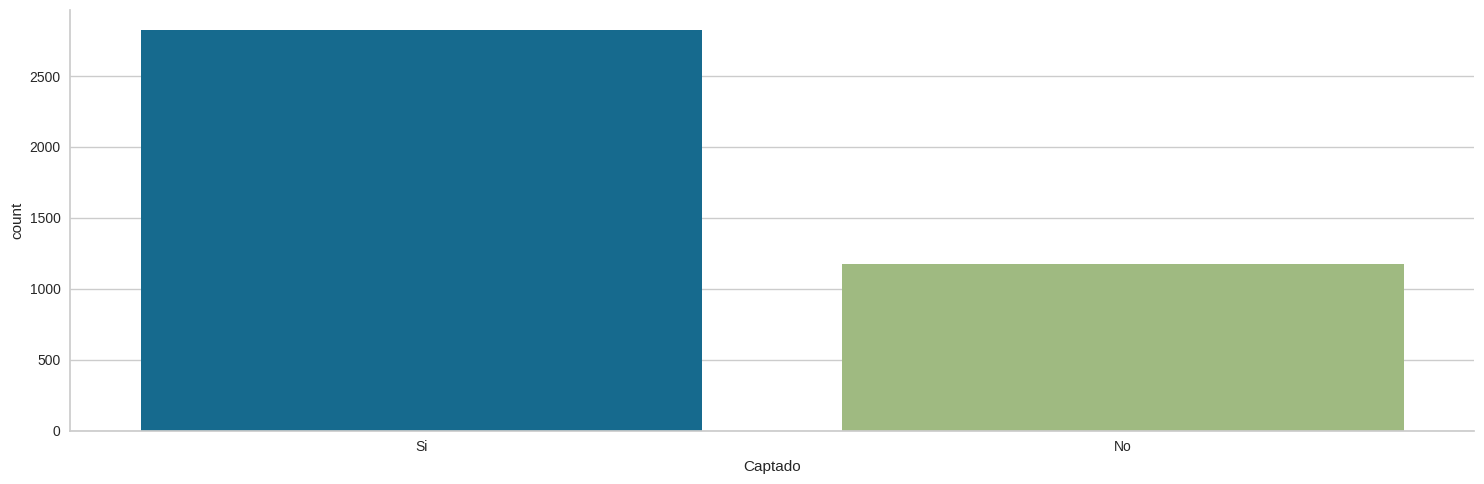

In [ ]:
sb.catplot(data = datos, x = "Captado", kind = "count", aspect = 3)
plt.show()

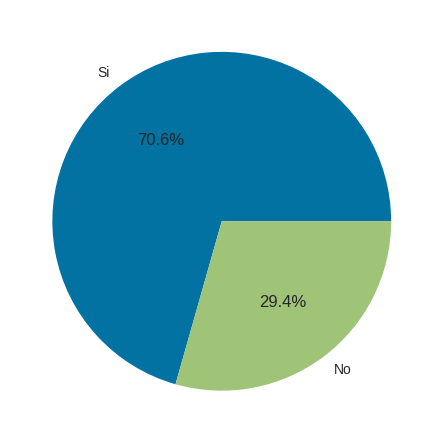

In [ ]:
plt.pie(x = datos.Captado.value_counts(), labels = datos.Captado.value_counts().index, autopct = "%0.01f%%")
plt.show()

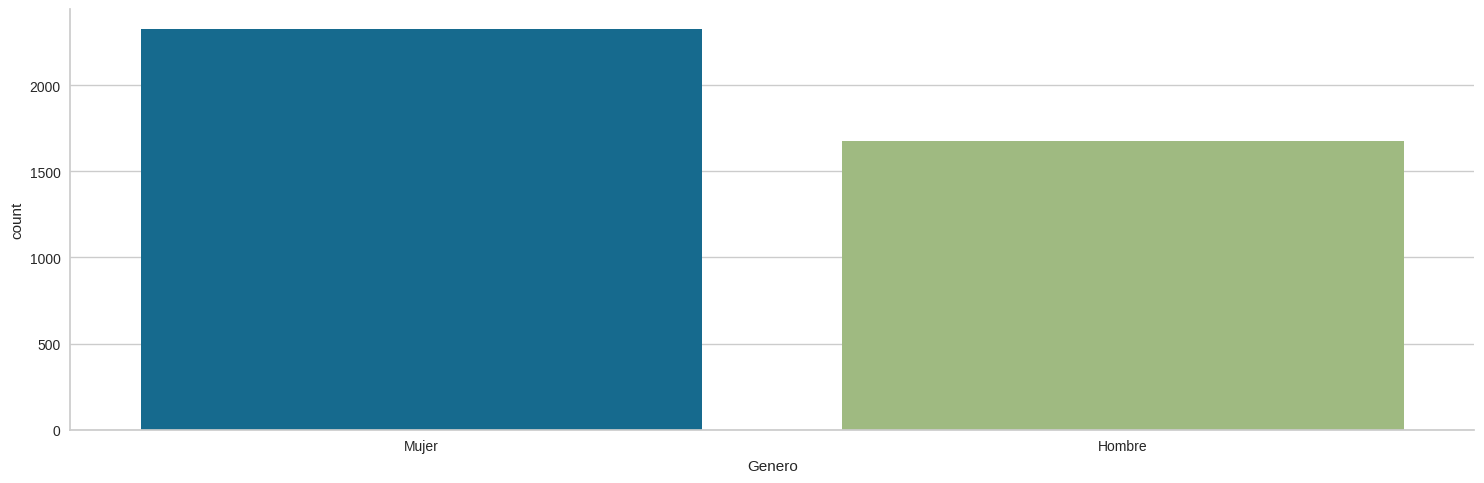

In [ ]:
sb.catplot(data = datos, x = "Genero", kind = "count", aspect = 3)
plt.show()

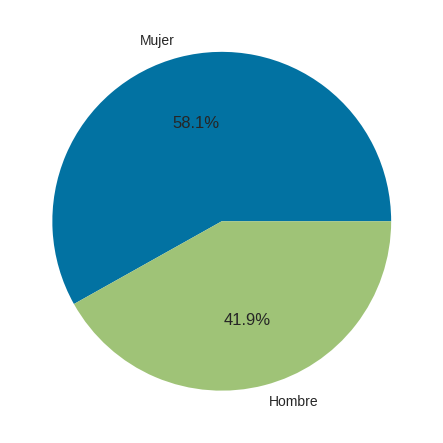

In [ ]:
plt.pie(x = datos.Genero.value_counts(), labels = datos.Genero.value_counts().index, autopct = "%0.01f%%")
plt.show()

### Graficos de Dispersión

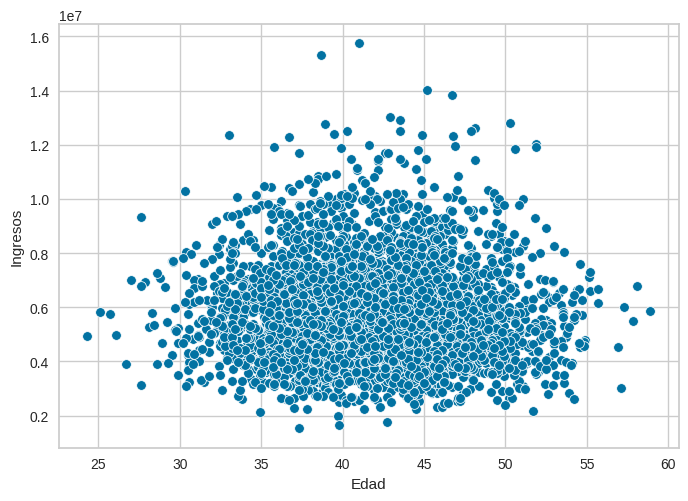

In [ ]:
sb.scatterplot(data = datos, x = "Edad", y = "Ingresos")
plt.show()

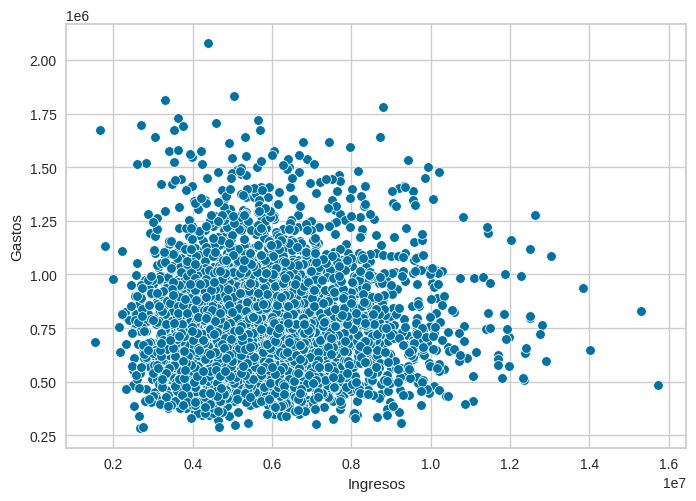

In [ ]:
sb.scatterplot(data = datos, x = "Ingresos", y = "Gastos")
plt.show()

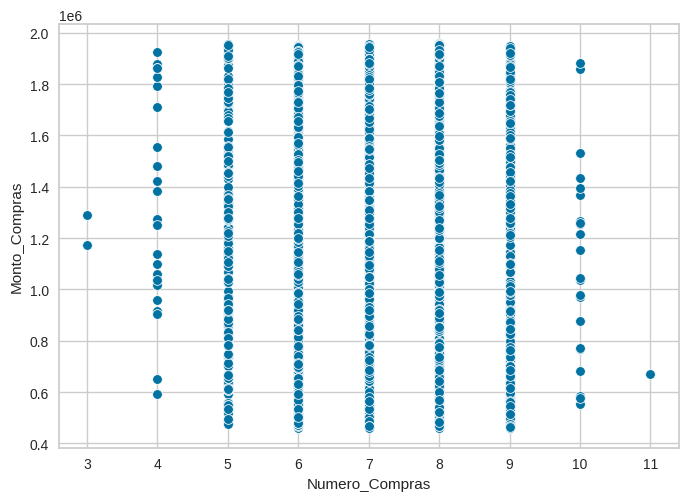

In [ ]:
sb.scatterplot(data = datos, x = "Numero_Compras", y = "Monto_Compras")
plt.show()

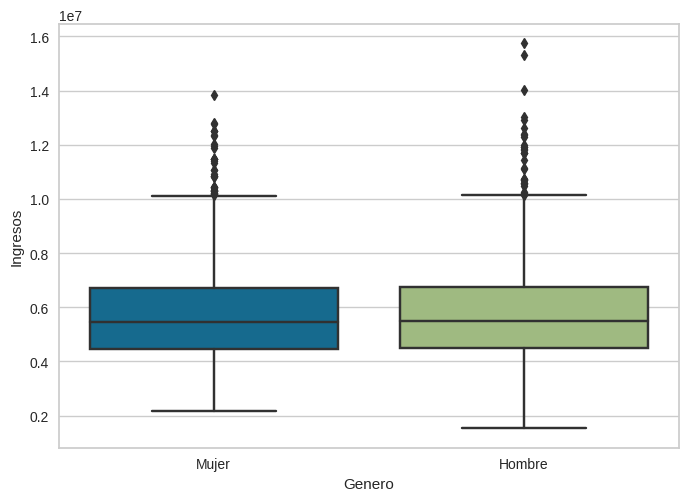

In [ ]:
sb.boxplot(data = datos, x = "Genero", y = "Ingresos")
plt.show()

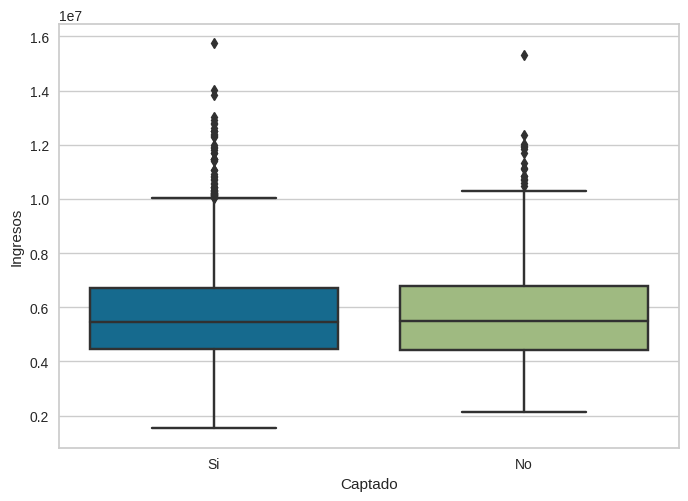

In [ ]:
sb.boxplot(data = datos, x = "Captado", y = "Ingresos")
plt.show()

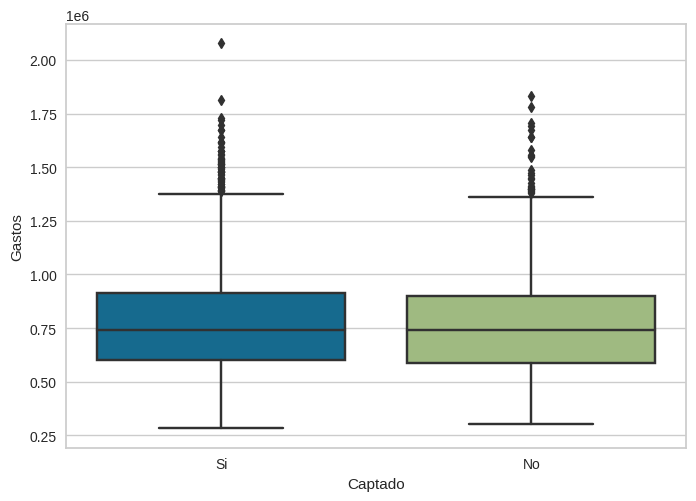

In [ ]:
sb.boxplot(data = datos, x = "Captado", y = "Gastos")
plt.show()

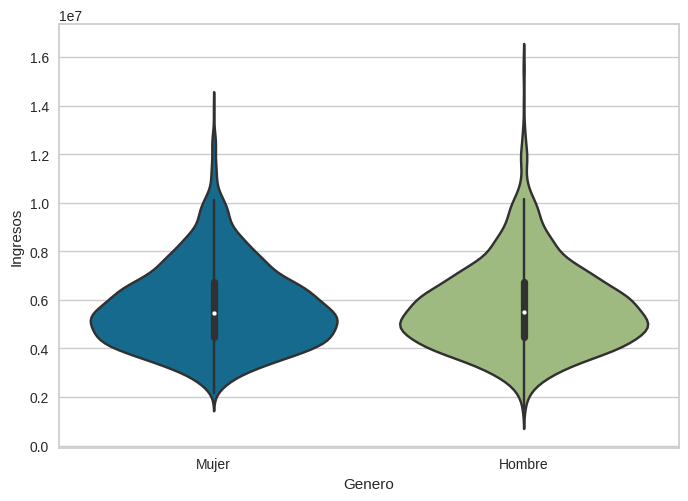

In [ ]:
sb.violinplot(data = datos, x = "Genero", y = "Ingresos")
plt.show()

## Análisis Multivariado

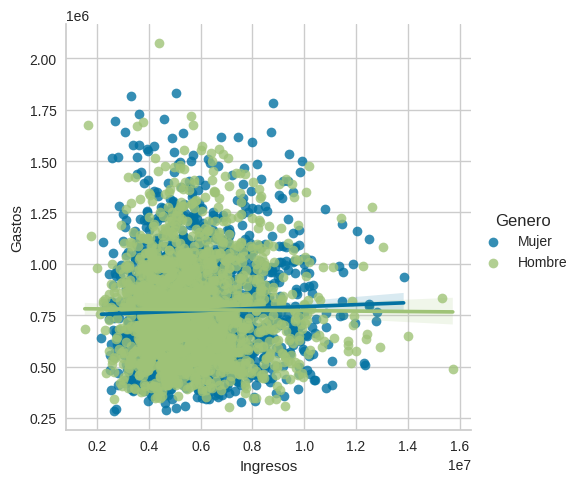

In [ ]:
sb.lmplot(data = datos, x = "Ingresos", y = "Gastos", hue = "Genero")
plt.show()

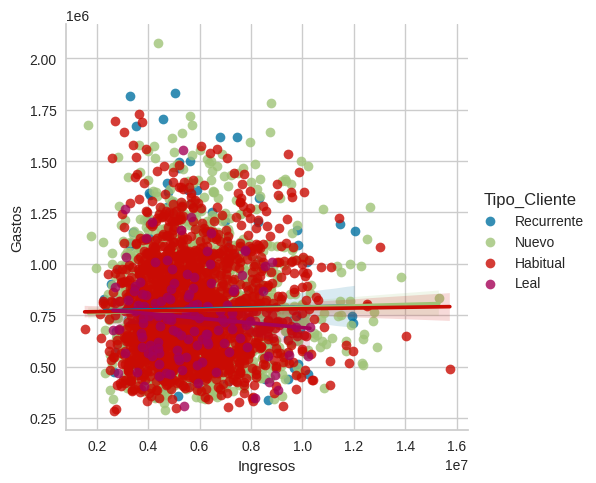

In [ ]:
sb.lmplot(data = datos, x = "Ingresos", y = "Gastos", hue = "Tipo_Cliente")
plt.show()

In [ ]:
fig = px.scatter_3d(data_frame = datos, x = "Ingresos", y = "Gastos", z = "Edad", color = "Tipo_Cliente")
fig.show()

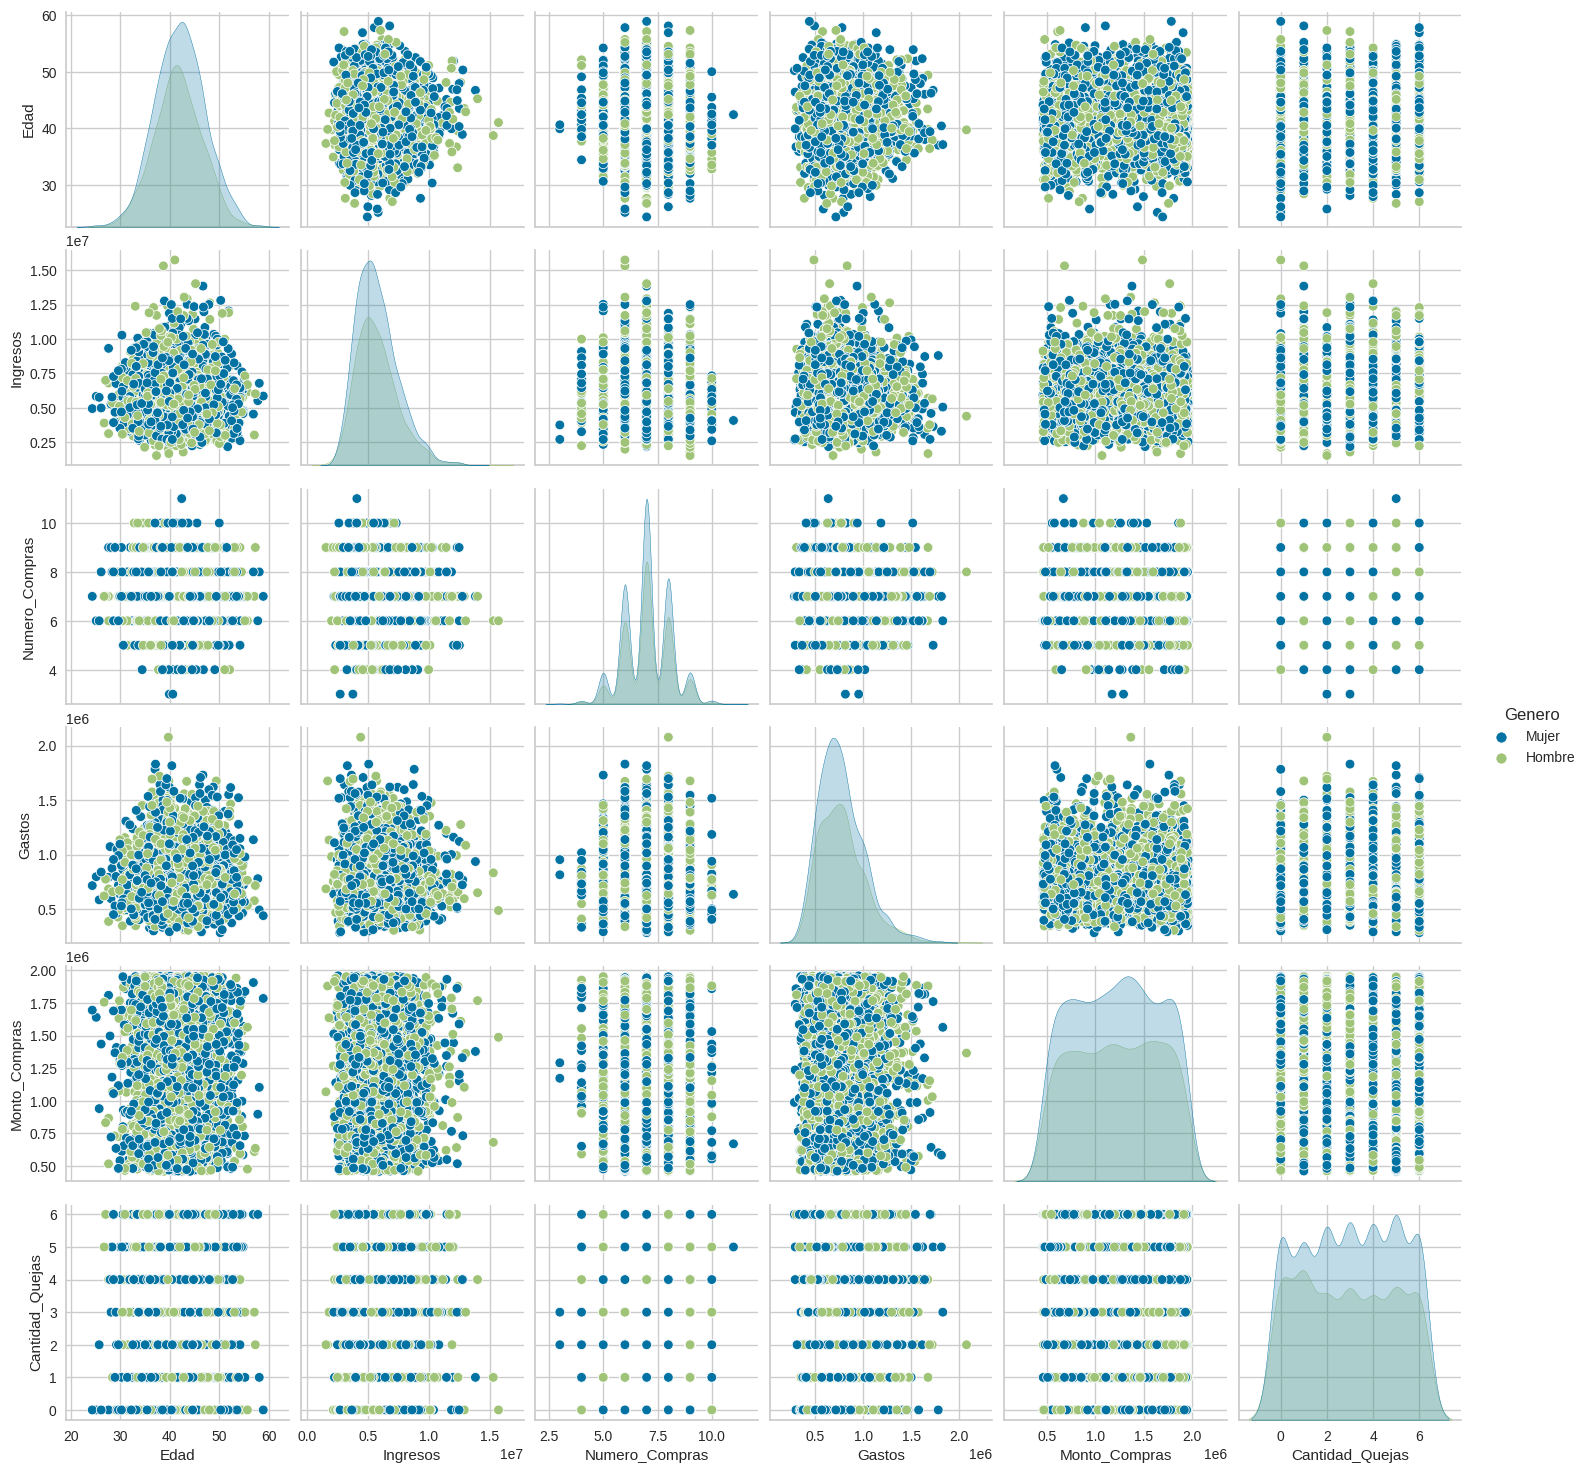

In [ ]:
sb.pairplot(data = datos, hue = "Genero")
plt.show()

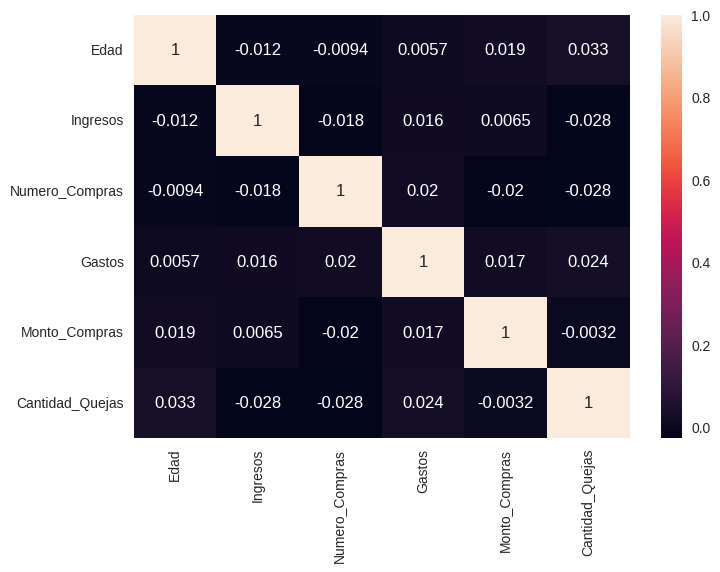

In [ ]:
sb.heatmap(datos.corr(numeric_only = True), annot = True)
plt.show()

## **Preparación de datos**

In [ ]:
#Separación de variables por tipo
numCols = datos.select_dtypes(include = ['float64', 'int64']).columns.to_list()
catCols = datos.select_dtypes(include = ['object']).columns.to_list()

#Crear los transformadores de variables
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])
catTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

#Diseñar el transformador de columnas
preprocesador = ColumnTransformer(transformers = [
    ('num', numTransformer, numCols),
    ('cat', catTransformer, catCols)
], remainder = 'passthrough')

set_config(display = 'diagram')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Edad', 'Ingresos', 'Numero_Compras',
                                  'Gastos', 'Monto_Compras',
                                  'Cantidad_Quejas']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Nivel_Satisfaccion', 'Ubicacion',
                                  'Tipo_Cliente', 'Genero', 'Captado'])])

In [ ]:
datosPre = preprocesador.fit_transform(datos)
codCat = preprocesador.named_transformers_['cat']['onehot'].get_feature_names_out(catCols)
labels = np.concatenate([numCols, codCat])
datosPro = pd.DataFrame(datosPre, columns = labels)
datosPro.head(10)

,Edad,Ingresos,Numero_Compras,Gastos,Monto_Compras,Cantidad_Quejas,Nivel_Satisfaccion_Alto,Nivel_Satisfaccion_Bajo,Nivel_Satisfaccion_Medio,Nivel_Satisfaccion_Muy_Alto,...,Ubicacion_Tunja,Ubicacion_Villavicencio,Tipo_Cliente_Habitual,Tipo_Cliente_Leal,Tipo_Cliente_Nuevo,Tipo_Cliente_Recurrente,Genero_Hombre,Genero_Mujer,Captado_No,Captado_Si
0,0.511561,0.302781,0.500,0.186037,0.192464,0.666667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.500000,0.446317,0.625,0.132433,0.085240,0.000000,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.841040,0.320626,0.375,0.413612,0.988638,0.833333,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.604046,0.152762,0.375,0.647720,0.723559,1.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.453757,0.207749,0.625,0.304111,0.596772,0.666667,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.196532,0.274611,0.625,0.195192,0.601559,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,0.644509,0.307235,0.625,0.600650,0.799033,0.166667,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
7,0.658960,0.302208,0.500,0.373723,0.568655,0.666667,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8,0.482659,0.389732,0.375,0.233862,0.597639,0.166667,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,0.387283,0.217617,0.500,0.391592,0.832862,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
datosPro.describe()

,Edad,Ingresos,Numero_Compras,Gastos,Monto_Compras,Cantidad_Quejas,Nivel_Satisfaccion_Alto,Nivel_Satisfaccion_Bajo,Nivel_Satisfaccion_Medio,Nivel_Satisfaccion_Muy_Alto,...,Ubicacion_Tunja,Ubicacion_Villavicencio,Tipo_Cliente_Habitual,Tipo_Cliente_Leal,Tipo_Cliente_Nuevo,Tipo_Cliente_Recurrente,Genero_Hombre,Genero_Mujer,Captado_No,Captado_Si
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.507652,0.296233,0.503281,0.273863,0.507645,0.498458,0.272500,0.279250,0.241750,0.131750,...,0.048750,0.057750,0.432000,0.031500,0.449000,0.087500,0.418750,0.581250,0.294000,0.706000
std,0.142457,0.124318,0.129200,0.133662,0.288940,0.335459,0.445301,0.448687,0.428197,0.338261,...,0.215372,0.233299,0.495416,0.174687,0.497454,0.282602,0.493416,0.493416,0.455649,0.455649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.410405,0.206615,0.375000,0.175289,0.259126,0.166667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.508671,0.277561,0.500000,0.256395,0.512448,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.604046,0.366216,0.625000,0.348677,0.753523,0.833333,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
datosPro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Edad                         4000 non-null   float64
 1   Ingresos                     4000 non-null   float64
 2   Numero_Compras               4000 non-null   float64
 3   Gastos                       4000 non-null   float64
 4   Monto_Compras                4000 non-null   float64
 5   Cantidad_Quejas              4000 non-null   float64
 6   Nivel_Satisfaccion_Alto      4000 non-null   float64
 7   Nivel_Satisfaccion_Bajo      4000 non-null   float64
 8   Nivel_Satisfaccion_Medio     4000 non-null   float64
 9   Nivel_Satisfaccion_Muy_Alto  4000 non-null   float64
 10  Nivel_Satisfaccion_Muy_Bajo  4000 non-null   float64
 11  Ubicacion_Barranquilla       4000 non-null   float64
 12  Ubicacion_Bogotá             4000 non-null   float64
 13  Ubicacion_Bucarama

## **Modelado**

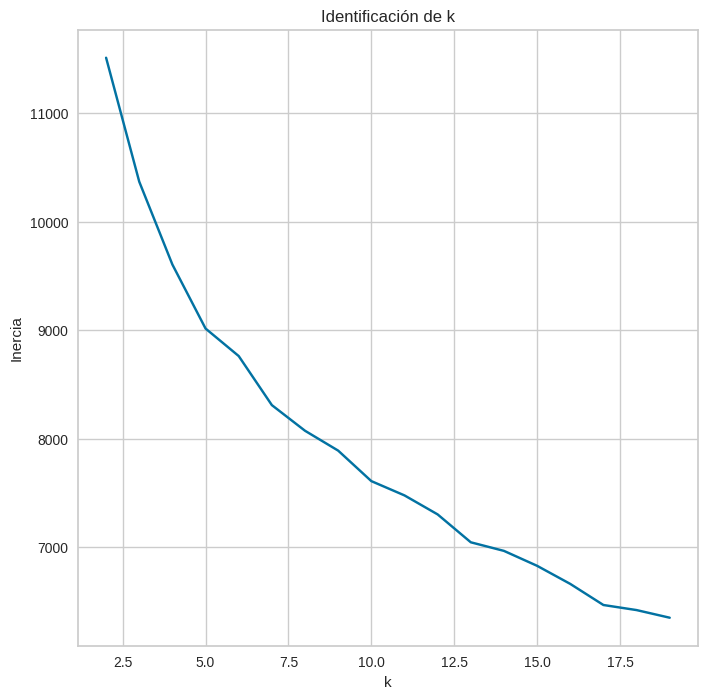

In [ ]:
#Método del codo (inercia)
sumDistancia = []
K = range(2, 20)
for k in K:
  km = KMeans(n_clusters = k, random_state = 123)
  km = km.fit(datosPro)
  sumDistancia.append(km.inertia_)

plt.figure(figsize = (8, 8))
plt.plot(K, sumDistancia, 'bx-')
plt.title('Identificación de k')
plt.xlabel('k')
plt.ylabel('Inercia')
plt.show()

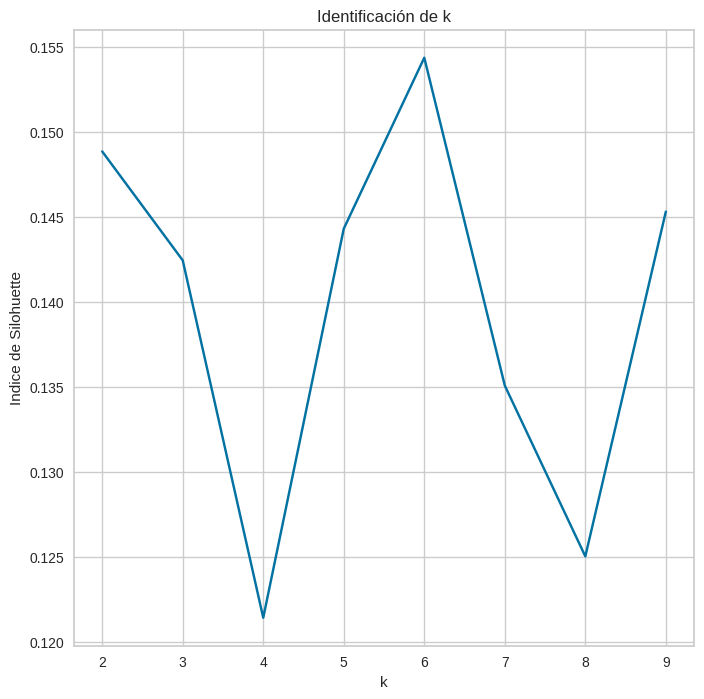

In [ ]:
numeroCluster = range(2, 10)
valoresIndice = []

for n_cluster in numeroCluster:
  modeloKmeans = KMeans(n_clusters = n_cluster, random_state = 123, n_init = 25)
  labels = modeloKmeans.fit_predict(datosPro)
  mediaSilohuette = silhouette_score(datosPro, labels)
  valoresIndice.append(mediaSilohuette)

plt.figure(figsize = (8, 8))
plt.plot(numeroCluster, valoresIndice, 'bx-')
plt.title('Identificación de k')
plt.xlabel('k')
plt.ylabel('Indice de Silohuette')
plt.show()

## **Modelado**

In [ ]:
modelo_final = KMeans(n_clusters = 6, random_state = 123, n_init = 25)
modelo_final.fit(datosPro)
grupos = modelo_final.predict(datosPro)
datosGrupos = datos
datosGrupos['Grupo KMeans'] = grupos

In [ ]:
centros = pd.DataFrame(modelo_final.cluster_centers_)
centros.columns = np.concatenate([numCols, codCat])
centros

,Edad,Ingresos,Numero_Compras,Gastos,Monto_Compras,Cantidad_Quejas,Nivel_Satisfaccion_Alto,Nivel_Satisfaccion_Bajo,Nivel_Satisfaccion_Medio,Nivel_Satisfaccion_Muy_Alto,...,Ubicacion_Tunja,Ubicacion_Villavicencio,Tipo_Cliente_Habitual,Tipo_Cliente_Leal,Tipo_Cliente_Nuevo,Tipo_Cliente_Recurrente,Genero_Hombre,Genero_Mujer,Captado_No,Captado_Si
0,0.509282,0.291097,0.502850,0.267638,0.521277,0.497286,0.275244,0.182410,0.219870,0.197068,...,0.084691,0.097720,3.485342e-01,5.537459e-02,4.478827e-01,1.482085e-01,-1.942890e-15,1.000000e+00,1.000000e+00,3.219647e-15
1,0.514688,0.299289,0.500546,0.276970,0.503566,0.516211,0.237158,0.337705,0.278689,0.090710,...,0.041530,0.048087,3.275158e-15,3.169399e-02,8.786885e-01,8.961749e-02,2.442491e-15,1.000000e+00,1.554312e-15,1.000000e+00
2,0.501018,0.302010,0.512456,0.273042,0.511495,0.501483,0.277580,0.188612,0.192171,0.202847,...,0.087189,0.076512,3.576512e-01,5.338078e-02,4.466192e-01,1.423488e-01,1.000000e+00,-7.771561e-16,1.000000e+00,2.553513e-15
3,0.506664,0.299271,0.508704,0.273196,0.500273,0.499678,0.311412,0.321083,0.199226,0.133462,...,0.019342,0.044487,1.000000e+00,-1.110223e-16,1.165734e-15,2.359224e-16,1.000000e+00,1.110223e-16,1.665335e-15,1.000000e+00
4,0.513554,0.295557,0.501884,0.271560,0.500239,0.506281,0.297739,0.302764,0.293970,0.084171,...,0.007538,0.027638,1.000000e+00,1.318390e-16,-2.553513e-15,6.522560e-16,1.110223e-15,1.000000e+00,2.109424e-15,1.000000e+00
5,0.494399,0.289649,0.496435,0.279937,0.512521,0.458054,0.251678,0.307047,0.221477,0.122483,...,0.067114,0.065436,-8.881784e-16,5.536913e-02,7.818792e-01,1.627517e-01,1.000000e+00,-1.443290e-15,1.831868e-15,1.000000e+00


In [ ]:
numInverseTransformer = preprocesador.named_transformers_['num']['scaler']
centNumInvTrans = numInverseTransformer.inverse_transform(centros[numCols])
catInverseTransformer = preprocesador.named_transformers_['cat']['onehot']
centCatInvTrans = catInverseTransformer.inverse_transform(centros[codCat])

In [ ]:
centros_transformados = pd.DataFrame(np.concatenate([centNumInvTrans, centCatInvTrans], axis = 1), columns = np.concatenate([numCols, catCols]))
centros_transformados

,Edad,Ingresos,Numero_Compras,Gastos,Monto_Compras,Cantidad_Quejas,Nivel_Satisfaccion,Ubicacion,Tipo_Cliente,Genero,Captado
0,41.921173,5663137.187134,7.022801,762422.340717,1240403.962541,2.983713,Alto,Medellín,Nuevo,Mujer,No
1,42.108197,5779539.397486,7.004372,779175.401202,1213837.885246,3.097268,Bajo,Medellín,Nuevo,Mujer,Si
2,41.635231,5818194.611032,7.099644,772123.941993,1225731.576512,3.008897,Alto,Bogotá,Nuevo,Hombre,No
3,41.830561,5779276.084526,7.069632,772399.633656,1208898.609284,2.998066,Bajo,Medellín,Habitual,Hombre,Si
4,42.06897,5726503.015075,7.015075,769462.435804,1208846.787688,3.037688,Bajo,Medellín,Habitual,Mujer,Si
5,41.406208,5642555.838423,6.971477,784500.641779,1227270.333893,2.748322,Bajo,Medellín,Nuevo,Hombre,Si


In [ ]:
datosGrupos

,Edad,Ingresos,Numero_Compras,Gastos,Nivel_Satisfaccion,Ubicacion,Tipo_Cliente,Monto_Compras,Genero,Captado,Cantidad_Quejas,Grupo KMeans
113722,42.0,5829144.5,7.0,615933.8,Medio,Cali,Recurrente,747196,Mujer,Si,4,1
94313,41.6,7868661.0,8.0,519705.2,Bajo,Tunja,Nuevo,586364,Hombre,No,0,2
92222,53.4,6082712.1,6.0,1024471.3,Muy_Bajo,Barranquilla,Habitual,1941428,Hombre,Si,5,3
9467,45.2,3697530.8,6.0,1444736.9,Bajo,Cali,Nuevo,1543819,Mujer,Si,6,1
79184,40.0,4478846.5,8.0,827897.6,Medio,Bucaramanga,Habitual,1353643,Hombre,Si,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
26030,32.2,9173108.7,7.0,500828.4,Bajo,Bogotá,Nuevo,919353,Mujer,Si,0,1
94536,38.2,3651089.4,8.0,714480.1,Bajo,Bogotá,Nuevo,1110956,Mujer,No,0,0
103354,42.8,4814390.4,6.0,551266.9,Bajo,Villavicencio,Nuevo,777885,Mujer,No,6,0
19839,43.6,4248339.1,9.0,551349.5,Bajo,Cali,Nuevo,1332768,Mujer,Si,6,1


In [ ]:
datosGrupos['Grupo KMeans'].value_counts()

1    915
4    796
0    614
5    596
2    562
3    517
Name: Grupo KMeans, dtype: int64

In [ ]:
fig = px.scatter_3d(data_frame = datosGrupos, x = 'Ingresos', y = 'Gastos', z = 'Edad', color = 'Grupo KMeans')
fig.show()

## **Agrupamiento Jerárquico**

In [ ]:
#Función para dibujar un dendograma
def dibujarDendrograma(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
cluster_ward = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward', n_clusters = None, distance_threshold = 0)
cluster_ward.fit(datosPro)

AgglomerativeClustering(affinity='euclidean', distance_threshold=0,
                        n_clusters=None)

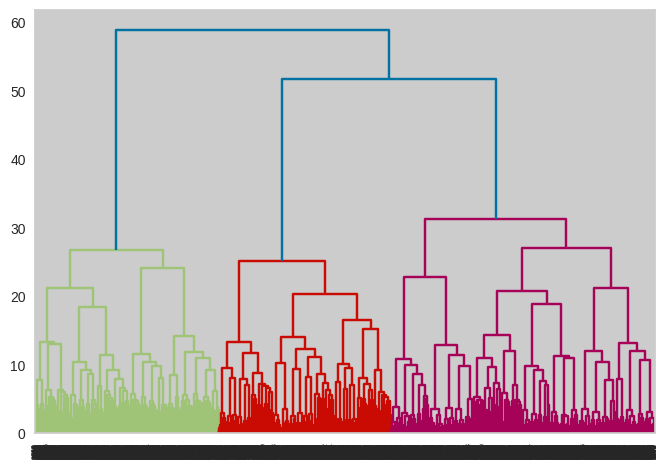

In [ ]:
dibujarDendrograma(cluster_ward)
plt.show()

In [ ]:
modelo_final_jerarquico = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward', n_clusters = 4)
modelo_final_jerarquico.fit(datosPro)
labels = modelo_final_jerarquico.labels_
datosGrupos['Grupo Jerarquico'] = labels
datosGrupos

,Edad,Ingresos,Numero_Compras,Gastos,Nivel_Satisfaccion,Ubicacion,Tipo_Cliente,Monto_Compras,Genero,Captado,Cantidad_Quejas,Grupo KMeans,Grupo Jerarquico
113722,42.0,5829144.5,7.0,615933.8,Medio,Cali,Recurrente,747196,Mujer,Si,4,1,0
94313,41.6,7868661.0,8.0,519705.2,Bajo,Tunja,Nuevo,586364,Hombre,No,0,2,1
92222,53.4,6082712.1,6.0,1024471.3,Muy_Bajo,Barranquilla,Habitual,1941428,Hombre,Si,5,3,2
9467,45.2,3697530.8,6.0,1444736.9,Bajo,Cali,Nuevo,1543819,Mujer,Si,6,1,3
79184,40.0,4478846.5,8.0,827897.6,Medio,Bucaramanga,Habitual,1353643,Hombre,Si,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26030,32.2,9173108.7,7.0,500828.4,Bajo,Bogotá,Nuevo,919353,Mujer,Si,0,1,3
94536,38.2,3651089.4,8.0,714480.1,Bajo,Bogotá,Nuevo,1110956,Mujer,No,0,0,1
103354,42.8,4814390.4,6.0,551266.9,Bajo,Villavicencio,Nuevo,777885,Mujer,No,6,0,1
19839,43.6,4248339.1,9.0,551349.5,Bajo,Cali,Nuevo,1332768,Mujer,Si,6,1,3


In [ ]:
datosGrupos['Grupo Jerarquico'].value_counts()

1    1185
0    1174
2    1112
3     529
Name: Grupo Jerarquico, dtype: int64

In [ ]:
fig = px.scatter_3d(data_frame = datosGrupos, x = 'Ingresos', y = 'Gastos', z = 'Edad', color = 'Grupo Jerarquico')
fig.show()

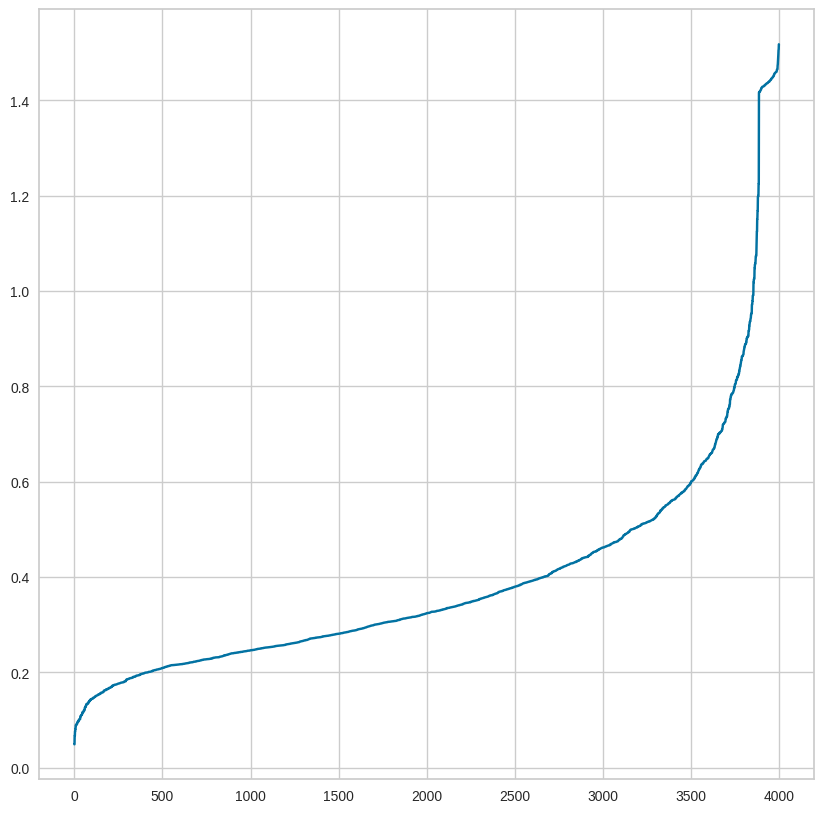

In [ ]:
#Identificar rango de distancias para epsilon
neighbors = NearestNeighbors(n_neighbors = 3)
neighbors_fit = neighbors.fit(datosPro)
distances, indice = neighbors_fit.kneighbors(datosPro)
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.figure(figsize = (10, 10))
plt.plot(distances)
plt.show()

In [ ]:
valores_eps = np.arange(0.4, 1.2, 0.1)
min_muestras = np.arange(2,10)
parametros = list(product(valores_eps, min_muestras))
sil_score = []
for p in parametros:
  y_pred = DBSCAN(eps = p[0], min_samples = p[1]).fit_predict(datosPro)
  sil_score.append(silhouette_score(datosPro, y_pred))

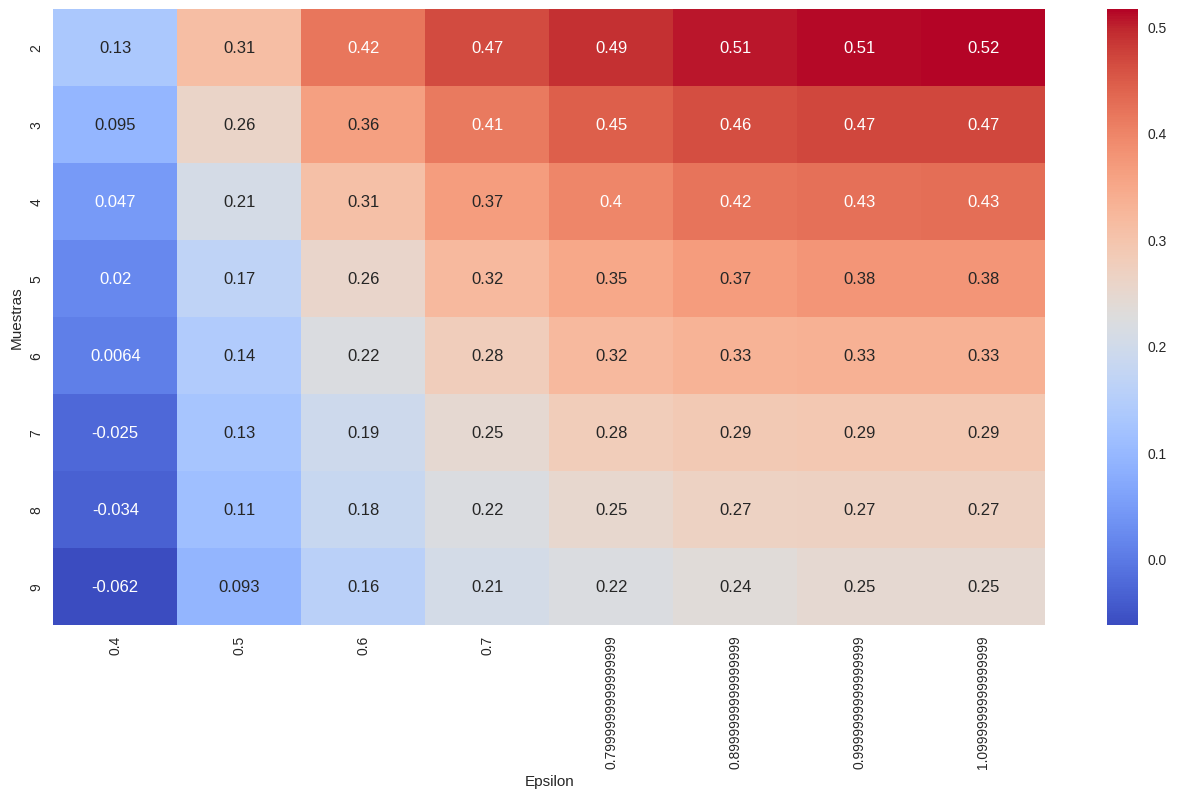

In [ ]:
df_ajuste_parametros = pd.DataFrame.from_records(parametros, columns = ['Epsilon', 'Muestras'])
df_ajuste_parametros['Score'] = sil_score
datos_cruzados = pd.pivot_table(df_ajuste_parametros, values = 'Score', index = 'Muestras', columns = 'Epsilon')
plt.figure(figsize = (16, 8))
sb.heatmap(datos_cruzados, annot = True, fmt = '.2g', cmap = 'coolwarm')
plt.show()

In [ ]:
modelo_final_dbscan = DBSCAN(eps = 1, min_samples = 3)
grupos = modelo_final_dbscan.fit_predict(datosPro)
datosGrupos['Grupo DBSCAN'] = grupos
datosGrupos

,Edad,Ingresos,Numero_Compras,Gastos,Nivel_Satisfaccion,Ubicacion,Tipo_Cliente,Monto_Compras,Genero,Captado,Cantidad_Quejas,Grupo KMeans,Grupo Jerarquico,Grupo DBSCAN
113722,42.0,5829144.5,7.0,615933.8,Medio,Cali,Recurrente,747196,Mujer,Si,4,1,0,-1
94313,41.6,7868661.0,8.0,519705.2,Bajo,Tunja,Nuevo,586364,Hombre,No,0,2,1,0
92222,53.4,6082712.1,6.0,1024471.3,Muy_Bajo,Barranquilla,Habitual,1941428,Hombre,Si,5,3,2,-1
9467,45.2,3697530.8,6.0,1444736.9,Bajo,Cali,Nuevo,1543819,Mujer,Si,6,1,3,1
79184,40.0,4478846.5,8.0,827897.6,Medio,Bucaramanga,Habitual,1353643,Hombre,Si,4,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26030,32.2,9173108.7,7.0,500828.4,Bajo,Bogotá,Nuevo,919353,Mujer,Si,0,1,3,95
94536,38.2,3651089.4,8.0,714480.1,Bajo,Bogotá,Nuevo,1110956,Mujer,No,0,0,1,91
103354,42.8,4814390.4,6.0,551266.9,Bajo,Villavicencio,Nuevo,777885,Mujer,No,6,0,1,219
19839,43.6,4248339.1,9.0,551349.5,Bajo,Cali,Nuevo,1332768,Mujer,Si,6,1,3,1


In [ ]:
datosGrupos['Grupo DBSCAN'].value_counts()

-1      333
 45      92
 3       82
 48      82
 95      73
       ... 
 302      3
 228      3
 226      3
 225      3
 320      3
Name: Grupo DBSCAN, Length: 324, dtype: int64

In [ ]:
fig = px.scatter_3d(data_frame = datosGrupos, x = 'Ingresos', y = 'Gastos', z = 'Edad', color = 'Grupo DBSCAN')
fig.show()

## **Definición del método**

In [ ]:
indice_k = silhouette_score(datosPro, modelo_final.predict(datosPro))
indice_jerarquico = silhouette_score(datosPro, modelo_final_jerarquico.fit_predict(datosPro))
indice_dbscan = silhouette_score(datosPro, modelo_final_dbscan.fit_predict(datosPro))

In [ ]:
print(f'El indice de silhouette para el método KMeans es: {indice_k}')
print(f'El indice de silhouette para el método Jerárquico es: {indice_jerarquico}')
print(f'El indice de silhouette para el método DBSCAN es: {indice_dbscan}')

El indice de silhouette para el método KMeans es: 0.15434872931505067
El indice de silhouette para el método Jerárquico es: 0.096119859905177
El indice de silhouette para el método DBSCAN es: 0.4700005047594018
